In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp

In [2]:
df = pd.read_csv(" ")

In [3]:
report = pp.ProfileReport(df)

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Using pandas_profiling to make EDA report

In [5]:
report.to_widgets()

Summarize dataset:   0%|          | 0/28 [00:00<?, ?it/s]

C:\Users\kartik\AppData\Roaming\Python\Python38\site-packages\pandas_profiling\model\correlations.py:210: RuntimeWarning: invalid value encountered in greater_equal
  bool_index = abs(correlation_matrix.values) >= threshold


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

### Observations from the report

67 Missing values in Salary. Assuming these missing values are of the students who didn't get placed. (Status = Not placed = 67)

Salary data is right skewed. Very few people have salary greater than 40,000.

# Let us check placement status with respect to different features and see which are the significant features.

In [6]:
df = df.drop(["sl_no"],axis=1)
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### 1) If gender affect placements.

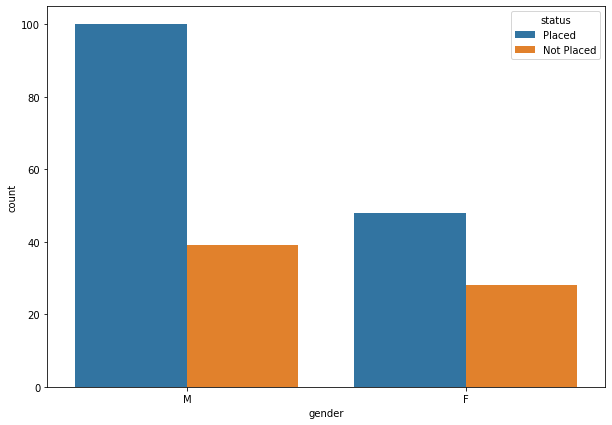

In [7]:
plt.figure(figsize = (10,7))
sns.countplot(x = "gender", hue = "status", data = df)

There are 139 Male studets and 76 Female students.

Male students have comparatively higher placemets. Yes. GENDER AFFECTS PLACEMENTS.

### 2) Whether Secondary Education affect placements

Text(0.5, 0, 'SSC Percentage')

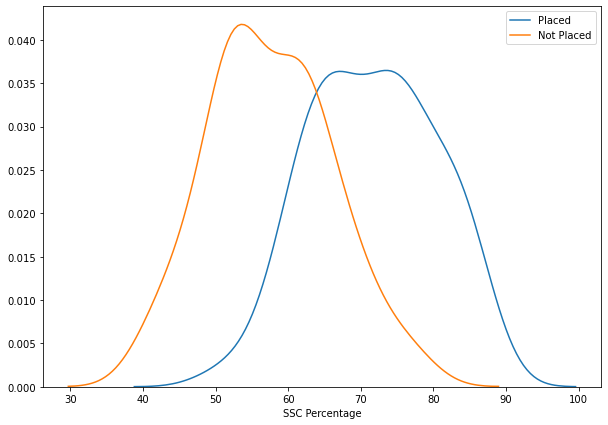

In [8]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["ssc_p"][df["status"]=="Placed"])
sns.kdeplot(df["ssc_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("SSC Percentage")

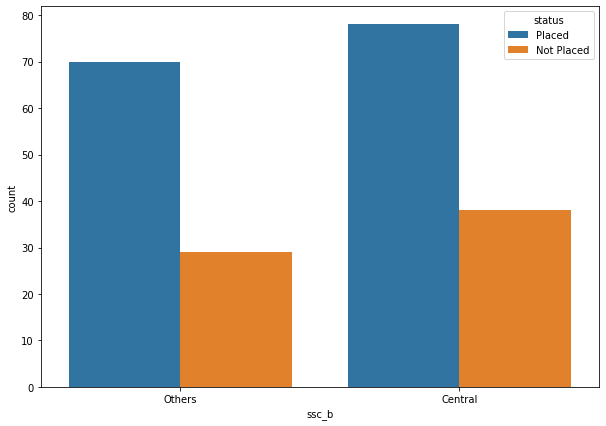

In [9]:
plt.figure(figsize = (10,7))
sns.countplot("ssc_b", hue="status", data=df)

Students with SSC Percentage above 90% are placed

Students with SSC Percentage below 40% are not-placed

Students with good SSC Percentage are placed on average.

SSC Percentage DOES affect the placement status.
Board Of Secondary Education DOES NOT affect much to Placement Status.

### 3) If Higher Secondary School affect Placements

Text(0.5, 0, 'HSC Percentage')

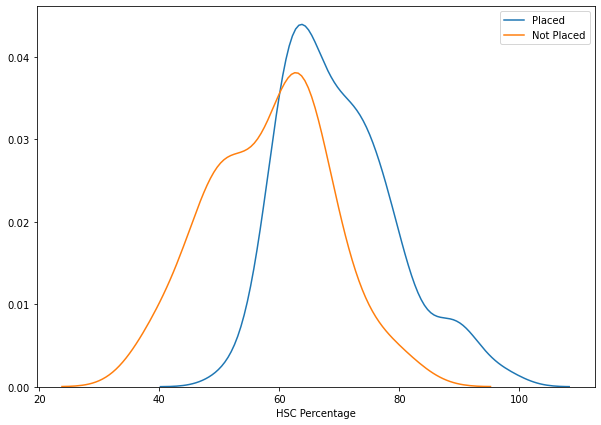

In [10]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["hsc_p"][df["status"]=="Placed"])
sns.kdeplot(df["hsc_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("HSC Percentage")

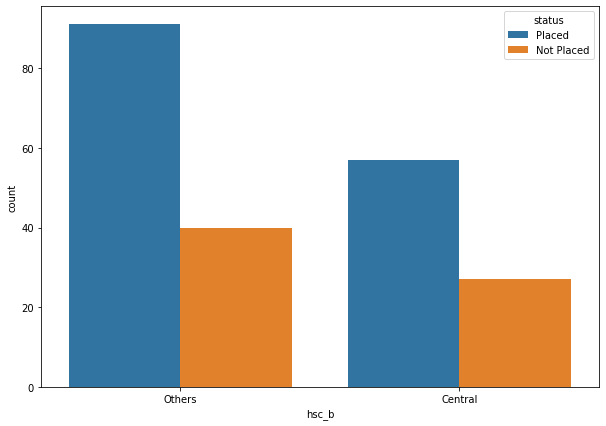

In [11]:
plt.figure(figsize = (10,7))
sns.countplot("hsc_b", hue="status", data=df)

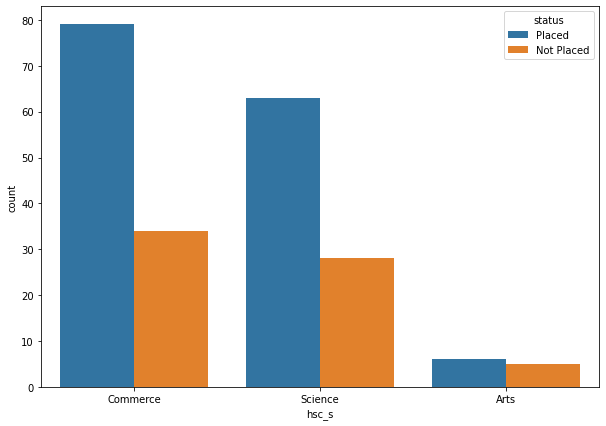

In [12]:
plt.figure(figsize = (10,7))
sns.countplot("hsc_s", hue="status", data=df)

More placements for percentage above 65%.

Drop in placements below 60%. Therefore, there might be a criteria that "Percentage must be atleast 60 for chance of being placed".

We have very less students with Arts specialization. Students from Science and Commerse field have good chance of placement.

HSC percentage and HSC Specialization DOES affect Placement Status. Board Of Higher Secondary Education DOES NOT affect much to Placement Status.

### 4) Does Under Graduate affect placements?

Text(0.5, 0, 'UG Percentage')

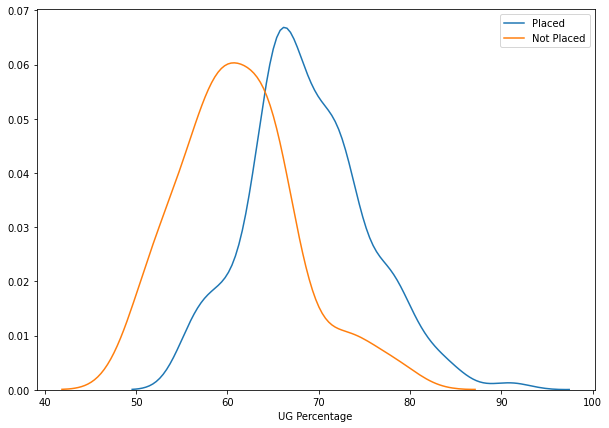

In [13]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["degree_p"][df["status"]=="Placed"])
sns.kdeplot(df["degree_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("UG Percentage")

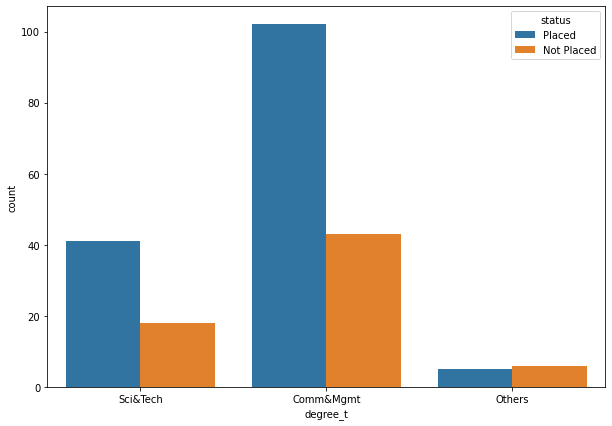

In [14]:
plt.figure(figsize = (10,7))
sns.countplot(x = "degree_t", hue = "status", data = df)

More placements for percentage above 65.

There are very less students with "Other". We cant make decision from few cases.

Around 2:1 placed:unplaced ratio for both Science and Commerse students.

UG percentage and UG Specialization DOES affect Placement Status.

### 5) Does Work Experience affect placements?

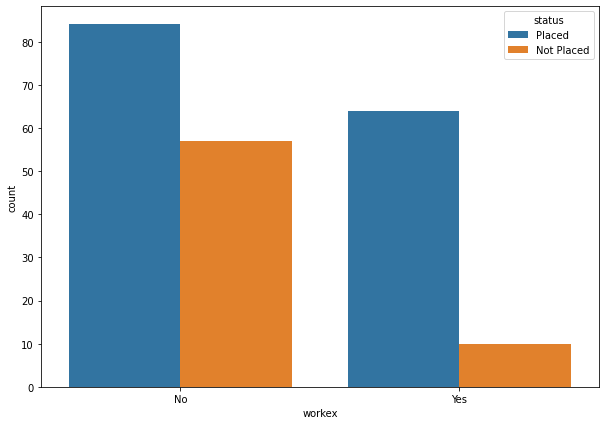

In [15]:
plt.figure(figsize = (10,7))
sns.countplot("workex", hue="status", data = df)

Work Exp DOES affect Placement. Very few students with work experience not getting placed.

### 6) Employability test percentage?

Text(0.5, 0, 'Employability test percentage')

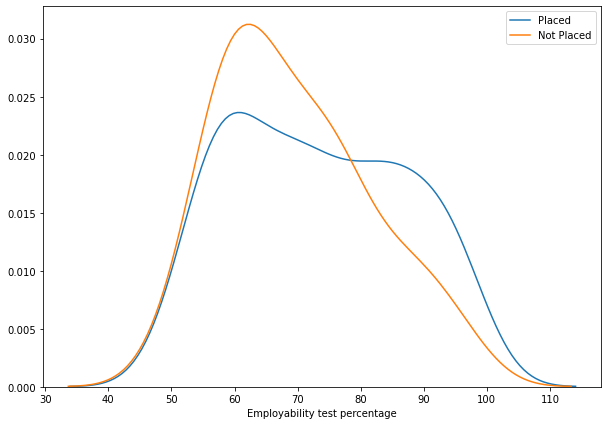

In [16]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["etest_p"][df["status"]=="Placed"])
sns.kdeplot(df["etest_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("Employability test percentage")

More "Not Placed" are of 50%-70% range and more placed are of >0% percentage range. Employability test percentage DOES affect Placement Status.

### 7) What about Post Graduate Specialization

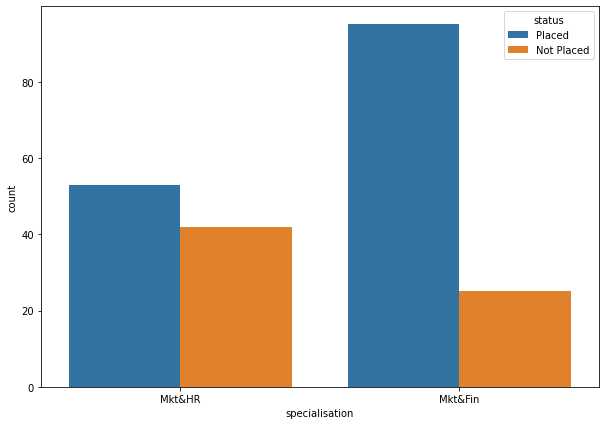

In [17]:
plt.figure(figsize = (10,7))
sns.countplot("specialisation", hue="status", data = df)

Text(0.5, 0, 'PG Percentage')

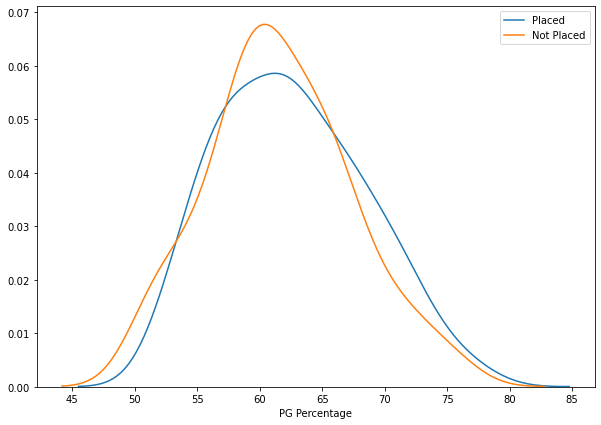

In [18]:
plt.figure(figsize = (10,7))
sns.kdeplot(df["mba_p"][df["status"]=="Placed"])
sns.kdeplot(df["mba_p"][df["status"]=="Not Placed"])
plt.legend(["Placed", "Not Placed"])
plt.xlabel("PG Percentage")

MBA Specialization feature DOES affect Placement status.

Comparitively very low not-placed students in Mkt&Fin Section.

MBA Percentage DOES affect placement status. From 65% to 80% there are students placed.

# List of features which are important for placement status

Gender

SSC Percentage

HSC Percentage

HSC Specialization

UG Percentage

UG Specialization

Work Experience

Employability test percentage

MBA Specialization

MBA Percentage

### Dropping SSC & HSC board of education and salary because they do not have much affect on Placement Status. Salary because, the discussion of salary is done after the student is placed. So, for predicting placement status we don't need salary

In [19]:
data = df.drop(["ssc_b","hsc_b","salary"], axis = 1)
data.head()

,gender,ssc_p,hsc_p,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,91.00,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,78.33,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,68.00,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,52.00,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,73.60,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


# Feature Encoding

In [20]:
data.dtypes

gender             object
ssc_p             float64
hsc_p             float64
hsc_s              object
degree_p          float64
degree_t           object
workex             object
etest_p           float64
specialisation     object
mba_p             float64
status             object
dtype: object

In [21]:
data_cat = data[["gender","hsc_s","degree_t","workex","specialisation","status"]]
data_cont = data[["ssc_p","hsc_p","degree_p","etest_p","mba_p"]]

In [22]:
temp = pd.get_dummies(data_cat, drop_first = True)

In [23]:
temp.head()

,gender_M,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,1,1,0,0,1,0,1,1
1,1,0,1,0,1,1,0,1
2,1,0,0,0,0,0,0,1
3,1,0,1,0,1,0,1,0
4,1,1,0,0,0,0,0,1


In [24]:
data = pd.concat([data_cont,temp],axis='columns')

In [25]:
data.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,1,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,1,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,1,1,0,0,0,0,0,1


# Model Creation

### Let us create models and check accuracy before doing any feature scaling. Decision Tree based Algorithm does not require feature scaling, and works great in presence of categorical columns.

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn import metrics

In [27]:
X = data.drop(["status_Placed"],axis = 1)
y = data["status_Placed"]

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 71)

In [29]:
print("X_train shape is {}".format(X_train.shape))
print("X_test shape is {}".format(X_test.shape))
print("y_train shape is {}".format(y_train.shape))
print("y_test shape is {}".format(y_test.shape))

X_train shape is (150, 12)
X_test shape is (65, 12)
y_train shape is (150,)
y_test shape is (65,)


## Decision Tree Classifier

In [30]:
dt = DecisionTreeClassifier(criterion = 'entropy')
dt.fit(X_train, y_train)


y_pred_dt = dt.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_dt))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_dt))
print("Precision:",metrics.precision_score(y_test, y_pred_dt))
print("Recall:",metrics.recall_score(y_test, y_pred_dt))


print('\nclassification report')
print(classification_report(y_test, y_pred_dt))


confustion matrix
[[12  8]
 [ 3 42]]


Accuracy: 0.8307692307692308
Precision: 0.84
Recall: 0.9333333333333333

classification report
              precision    recall  f1-score   support

           0       0.80      0.60      0.69        20
           1       0.84      0.93      0.88        45

    accuracy                           0.83        65
   macro avg       0.82      0.77      0.78        65
weighted avg       0.83      0.83      0.82        65



In [31]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",dt.score(X_train,y_train))
print("test Accuracy : ",dt.score(X_test,y_test))

Area Under ROC Curve: 0.7666666666666666
train Accuracy :  1.0
test Accuracy :  0.8307692307692308


## Random Forest Classifier

In [32]:
rf = RandomForestClassifier(criterion='gini',n_estimators = 20)
rf.fit(X_train, y_train)


y_pred_rf = rf.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_rf))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))
print("Precision:",metrics.precision_score(y_test, y_pred_rf))
print("Recall:",metrics.recall_score(y_test, y_pred_rf))


print('\nclassification report')
print(classification_report(y_test, y_pred_rf))


confustion matrix
[[12  8]
 [ 1 44]]


Accuracy: 0.8615384615384616
Precision: 0.8461538461538461
Recall: 0.9777777777777777

classification report
              precision    recall  f1-score   support

           0       0.92      0.60      0.73        20
           1       0.85      0.98      0.91        45

    accuracy                           0.86        65
   macro avg       0.88      0.79      0.82        65
weighted avg       0.87      0.86      0.85        65



In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",rf.score(X_train,y_train))
print("test Accuracy : ",rf.score(X_test,y_test))

Area Under ROC Curve: 0.788888888888889
train Accuracy :  1.0
test Accuracy :  0.8615384615384616


## K Nearest Neighbour Classification

In [34]:
neigh = KNeighborsClassifier(n_neighbors = 5) 
neigh.fit(X_train,y_train)


y_pred_knn = neigh.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_rf))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_knn))
print("Precision:",metrics.precision_score(y_test, y_pred_knn))
print("Recall:",metrics.recall_score(y_test, y_pred_knn))


print('\nclassification report')
print(classification_report(y_test, y_pred_knn))


confustion matrix
[[12  8]
 [ 1 44]]


Accuracy: 0.8769230769230769
Precision: 0.8627450980392157
Recall: 0.9777777777777777

classification report
              precision    recall  f1-score   support

           0       0.93      0.65      0.76        20
           1       0.86      0.98      0.92        45

    accuracy                           0.88        65
   macro avg       0.90      0.81      0.84        65
weighted avg       0.88      0.88      0.87        65



In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_knn, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",neigh.score(X_train,y_train))
print("test Accuracy : ",neigh.score(X_test,y_test))

Area Under ROC Curve: 0.8138888888888889
train Accuracy :  0.8866666666666667
test Accuracy :  0.8769230769230769


## Logistic Regression

In [36]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train, y_train)


y_pred_lr = lr.predict(X_test)


print('\nconfustion matrix') 
print(confusion_matrix(y_test, y_pred_lr))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_lr))
print("Precision:",metrics.precision_score(y_test, y_pred_lr))
print("Recall:",metrics.recall_score(y_test, y_pred_lr))


print('\nclassification report')
print(classification_report(y_test, y_pred_lr))


confustion matrix
[[12  8]
 [ 2 43]]


Accuracy: 0.8461538461538461
Precision: 0.8431372549019608
Recall: 0.9555555555555556

classification report
              precision    recall  f1-score   support

           0       0.86      0.60      0.71        20
           1       0.84      0.96      0.90        45

    accuracy                           0.85        65
   macro avg       0.85      0.78      0.80        65
weighted avg       0.85      0.85      0.84        65



In [37]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_lr, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",lr.score(X_train,y_train))
print("test Accuracy : ",lr.score(X_test,y_test))

Area Under ROC Curve: 0.7777777777777778
train Accuracy :  0.9066666666666666
test Accuracy :  0.8461538461538461


# We have applied 4 classification models without applying feature scaling. The accuracy is as follows:

Decision Tree Classifier -> 83%

Random Forest Classifier -> 84.6%

K Nearest Neighbour -> 87.6%

Logistic Regression -> 84.6%

## Now we shall perform feature scaling

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)

MinMaxScaler()

In [39]:
scaled_df = scaler.fit_transform(X)
X_scaled = pd.DataFrame(scaled_df, columns=X.columns)

In [40]:
X_scaled.head()

,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,0.538240,0.889621,0.195122,0.104167,0.284483,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.792414,0.680890,0.670244,0.760417,0.564843,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,0.497011,0.510708,0.341463,0.520833,0.247001,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.311482,0.247117,0.048780,0.333333,0.308096,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.925788,0.602965,0.568293,0.975000,0.160795,1.0,1.0,0.0,0.0,0.0,0.0,0.0


# Checking the significance of our features by OLS method

In [41]:
import statsmodels.api as sm

In [42]:
X_scaled = sm.add_constant(X_scaled)
X_scaled.head()

,const,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_M,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR
0,1.0,0.538240,0.889621,0.195122,0.104167,0.284483,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.792414,0.680890,0.670244,0.760417,0.564843,1.0,0.0,1.0,0.0,1.0,1.0,0.0
2,1.0,0.497011,0.510708,0.341463,0.520833,0.247001,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.311482,0.247117,0.048780,0.333333,0.308096,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,1.0,0.925788,0.602965,0.568293,0.975000,0.160795,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [43]:
model = sm.OLS(y, X_scaled).fit()

In [44]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          status_Placed   R-squared:                       0.560
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     21.42
Date:                Tue, 13 Jul 2021   Prob (F-statistic):           5.74e-30
Time:                        20:57:52   Log-Likelihood:                -51.350
No. Observations:                 215   AIC:                             128.7
Df Residuals:                     202   BIC:                             172.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.0004      0.130     -0.003      0.997      -0.256       0.255
ssc_p                     1.0058      0.134      7.508      0.000       0.742       1.270
hsc_p                     0.5832      0.161      3.625      0.000       0.266       0.900
degree_p                  0.6234      0.156      3.989      0.000       0.315       0.932
etest_p                  -0.1295      0.086     -1.512      0.132      -0.298       0.039
mba_p                    -0.5664      0.120     -4.706      0.000      -0.804      -0.329
gender_M                  0.0850      0.050      1.690      0.093      -0.014       0.184
hsc_s_Commerce           -0.1746      0.110     -1.582      0.115      -0.392       0.043
hsc_s_Science            -0.0966      0.118     -0.820      0.413      -0.329       0.136
degree_t_Others          -0.1341      0.111     -1.212      0.227      -0.352       0.084
degree_t_Sci&Tech        -0.1608      0.068     -2.375      0.018      -0.294      -0.027
workex_Yes                0.1659      0.048      3.467      0.001       0.072       0.260
specialisation_Mkt&HR    -0.0529      0.048     -1.099      0.273      -0.148       0.042
==============================================================================
Omnibus:                        2.973   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.226   Jarque-Bera (JB):                2.365
Skew:                          -0.125   Prob(JB):                        0.306
Kurtosis:                       2.551   Cond. No.                         17.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Applying scaled data to all 4 models

In [45]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_scaled, y, test_size=0.3, random_state = 71)

In [46]:
print("X_train shape is {}".format(X_train1.shape))
print("X_test shape is {}".format(X_test1.shape))
print("y_train shape is {}".format(y_train1.shape))
print("y_test shape is {}".format(y_test1.shape))

X_train shape is (150, 13)
X_test shape is (65, 13)
y_train shape is (150,)
y_test shape is (65,)


## Decison Tree (with Scaled)

In [47]:
dt = DecisionTreeClassifier(criterion = 'gini')
dt.fit(X_train1, y_train1)


y_pred1_dt = dt.predict(X_test1)


print('\nconfustion matrix') 
print(confusion_matrix(y_test1, y_pred1_dt))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1_dt))
print("Precision:",metrics.precision_score(y_test1, y_pred1_dt))
print("Recall:",metrics.recall_score(y_test1, y_pred1_dt))


print('\nclassification report')
print(classification_report(y_test1, y_pred1_dt))


confustion matrix
[[12  8]
 [ 5 40]]


Accuracy: 0.8
Precision: 0.8333333333333334
Recall: 0.8888888888888888

classification report
              precision    recall  f1-score   support

           0       0.71      0.60      0.65        20
           1       0.83      0.89      0.86        45

    accuracy                           0.80        65
   macro avg       0.77      0.74      0.75        65
weighted avg       0.79      0.80      0.80        65



In [48]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1_dt, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",dt.score(X_train1,y_train1))
print("test Accuracy : ",dt.score(X_test1,y_test1))

Area Under ROC Curve: 0.7444444444444445
train Accuracy :  1.0
test Accuracy :  0.8


## Random Forest Classifier (with scaled)

In [49]:
rf = RandomForestClassifier(criterion='gini', n_estimators = 20)
rf.fit(X_train1, y_train1)

estimator = rf.estimators_[5]

y_pred1_rf = rf.predict(X_test1)


print('\nconfustion matrix') 
print(confusion_matrix(y_test1, y_pred1_dt))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1_rf))
print("Precision:",metrics.precision_score(y_test1, y_pred1_rf))
print("Recall:",metrics.recall_score(y_test1, y_pred1_rf))


print('\nclassification report')
print(classification_report(y_test1, y_pred1_rf))


confustion matrix
[[12  8]
 [ 5 40]]


Accuracy: 0.8923076923076924
Precision: 0.88
Recall: 0.9777777777777777

classification report
              precision    recall  f1-score   support

           0       0.93      0.70      0.80        20
           1       0.88      0.98      0.93        45

    accuracy                           0.89        65
   macro avg       0.91      0.84      0.86        65
weighted avg       0.90      0.89      0.89        65



In [50]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1_rf, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",rf.score(X_train1,y_train1))
print("test Accuracy : ",rf.score(X_test1,y_test1))

Area Under ROC Curve: 0.8388888888888888
train Accuracy :  1.0
test Accuracy :  0.8923076923076924


# K Nearest Neighbour Classification (with Scaled)

In [51]:
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(X_train1, y_train1)


y_pred1_knn = knn.predict(X_test1)


print('\nconfustion matrix') 
print(confusion_matrix(y_test1, y_pred1_knn))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1_knn))
print("Precision:",metrics.precision_score(y_test1, y_pred1_knn))
print("Recall:",metrics.recall_score(y_test1, y_pred1_knn))


print('\nclassification report')
print(classification_report(y_test1, y_pred1_knn))


confustion matrix
[[10 10]
 [ 9 36]]


Accuracy: 0.7076923076923077
Precision: 0.782608695652174
Recall: 0.8

classification report
              precision    recall  f1-score   support

           0       0.53      0.50      0.51        20
           1       0.78      0.80      0.79        45

    accuracy                           0.71        65
   macro avg       0.65      0.65      0.65        65
weighted avg       0.70      0.71      0.71        65



In [52]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1_knn, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",knn.score(X_train1,y_train1))
print("test Accuracy : ",knn.score(X_test1,y_test1))

Area Under ROC Curve: 0.65
train Accuracy :  0.8266666666666667
test Accuracy :  0.7076923076923077


## Logistic Regression (with Scaled)

In [53]:
lr = LogisticRegression(solver='liblinear')
lr.fit(X_train1, y_train1)


y_pred1_lr = lr.predict(X_test1)


print('\nconfustion matrix') 
print(confusion_matrix(y_test1, y_pred1_lr))


print('\n')
print("Accuracy:",metrics.accuracy_score(y_test1, y_pred1_lr))
print("Precision:",metrics.precision_score(y_test1, y_pred1_lr))
print("Recall:",metrics.recall_score(y_test1, y_pred1_lr))


print('\nclassification report')
print(classification_report(y_test1, y_pred1_lr))


confustion matrix
[[10 10]
 [ 1 44]]


Accuracy: 0.8307692307692308
Precision: 0.8148148148148148
Recall: 0.9777777777777777

classification report
              precision    recall  f1-score   support

           0       0.91      0.50      0.65        20
           1       0.81      0.98      0.89        45

    accuracy                           0.83        65
   macro avg       0.86      0.74      0.77        65
weighted avg       0.84      0.83      0.81        65



In [54]:
fpr, tpr, thresholds = roc_curve(y_test1, y_pred1_lr, pos_label=1) 
print('Area Under ROC Curve:', auc(fpr, tpr))
print("train Accuracy : ",lr.score(X_train1,y_train1))
print("test Accuracy : ",lr.score(X_test1,y_test1))

Area Under ROC Curve: 0.7388888888888889
train Accuracy :  0.8866666666666667
test Accuracy :  0.8307692307692308


# After Scaling, the accuracy of models is as follows:

Decision Tree Classifier -> 83% --> 78.4%

Random Forest Classifier -> 86.15% --> 86.15%

K Nearest Neighbour -> 87.6% --> 70.7%

Logistic Regression -> 84.6% --> 83%

### So, our best model is Random Forest Classifier

# Visualizing the tree models

## 1) Decision Tree

In [55]:
from sklearn import tree 

[Text(569.625, 1019.25, 'X[1] <= 0.445\ngini = 0.43\nsamples = 150\nvalue = [47, 103]'),
 Text(209.25, 883.35, 'X[2] <= 0.354\ngini = 0.417\nsamples = 54\nvalue = [38, 16]'),
 Text(162.75, 747.45, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(255.75, 747.45, 'X[1] <= 0.298\ngini = 0.498\nsamples = 34\nvalue = [18, 16]'),
 Text(93.0, 611.55, 'X[5] <= 0.116\ngini = 0.278\nsamples = 12\nvalue = [10, 2]'),
 Text(46.5, 475.65, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(139.5, 475.65, 'X[2] <= 0.371\ngini = 0.165\nsamples = 11\nvalue = [10, 1]'),
 Text(93.0, 339.75, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(186.0, 339.75, 'gini = 0.0\nsamples = 10\nvalue = [10, 0]'),
 Text(418.5, 611.55, 'X[3] <= 0.351\ngini = 0.463\nsamples = 22\nvalue = [8, 14]'),
 Text(325.5, 475.65, 'X[2] <= 0.419\ngini = 0.497\nsamples = 13\nvalue = [7, 6]'),
 Text(279.0, 339.75, 'X[7] <= 0.5\ngini = 0.245\nsamples = 7\nvalue = [1, 6]'),
 Text(232.5, 203.85000000000002, 'gini = 0.0\nsamples = 1\nval

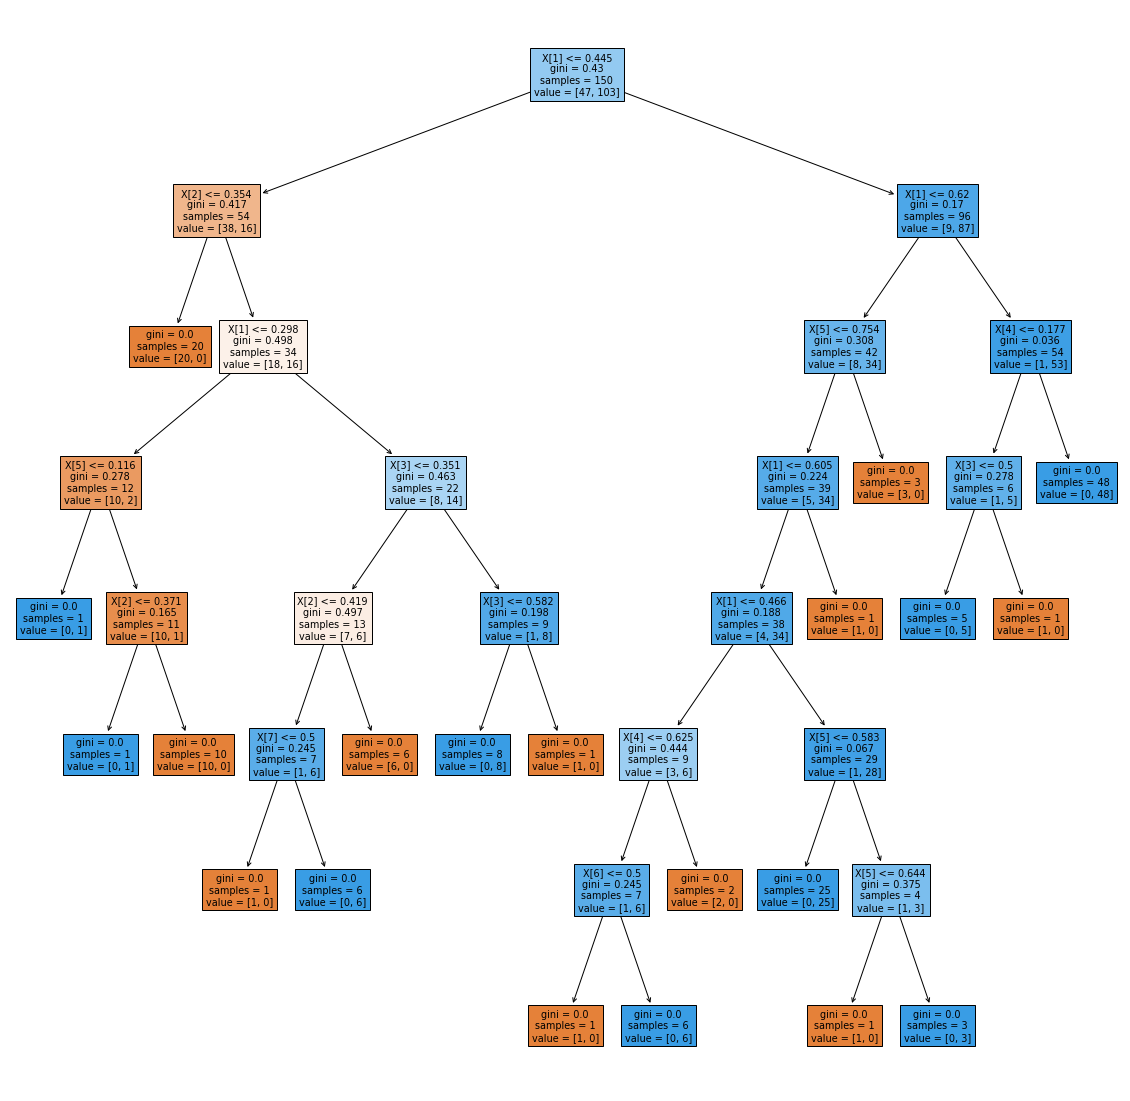

In [56]:
plt.figure(figsize=(20,20))
tree.plot_tree(dt, filled = True) 

## 2) Random Forest

In [57]:
len(rf.estimators_)

20

[Text(621.4090909090909, 1045.3846153846155, 'X[12] <= 0.5\ngini = 0.378\nsamples = 101\nvalue = [38, 112]'),
 Text(380.45454545454544, 961.7538461538462, 'X[4] <= 0.969\ngini = 0.313\nsamples = 64\nvalue = [19, 79]'),
 Text(253.63636363636363, 878.123076923077, 'X[3] <= 0.207\ngini = 0.294\nsamples = 62\nvalue = [17, 78]'),
 Text(152.1818181818182, 794.4923076923078, 'X[1] <= 0.445\ngini = 0.165\nsamples = 7\nvalue = [10, 1]'),
 Text(101.45454545454545, 710.8615384615384, 'gini = 0.0\nsamples = 6\nvalue = [10, 0]'),
 Text(202.9090909090909, 710.8615384615384, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(355.09090909090907, 794.4923076923078, 'X[11] <= 0.5\ngini = 0.153\nsamples = 55\nvalue = [7, 77]'),
 Text(304.3636363636364, 710.8615384615384, 'X[10] <= 0.5\ngini = 0.283\nsamples = 29\nvalue = [7, 34]'),
 Text(202.9090909090909, 627.2307692307693, 'X[1] <= 0.307\ngini = 0.284\nsamples = 24\nvalue = [6, 29]'),
 Text(152.1818181818182, 543.6, 'gini = 0.0\nsamples = 2\nvalue = [3,

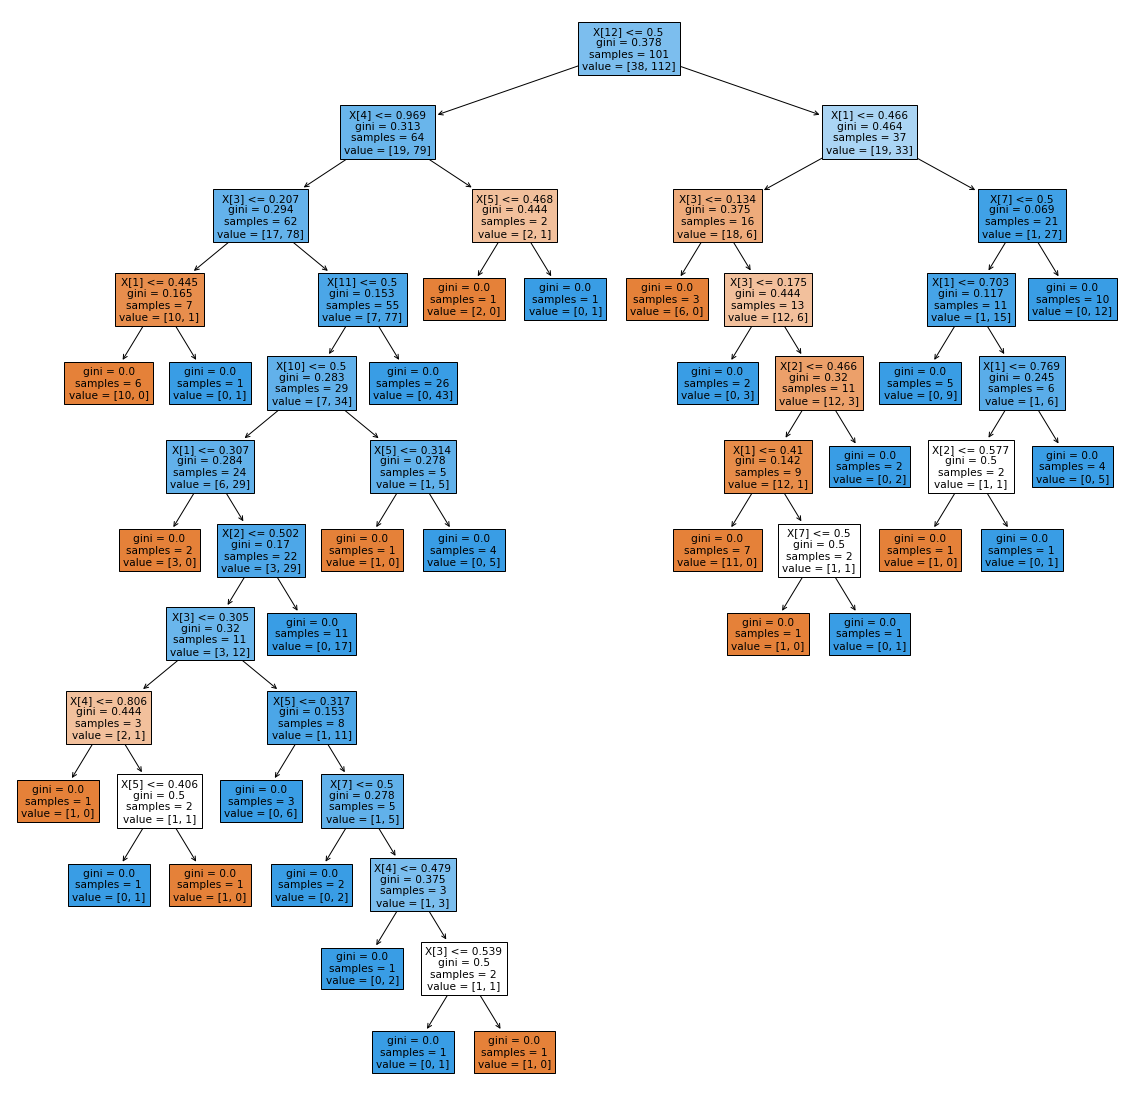

In [58]:
plt.figure(figsize=(20,20))
tree.plot_tree(rf.estimators_[1], filled = True)  #Plotting the first tree out of 20